<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/08-Statistics.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 08-Statistics

* Statistical inference
* Distributions of statistics
* Confidence intervals
* Hypothesis tests

## Reading

* Chapter 3 of [Introduction to Statistical Learning, 1st edition](https://www.statlearning.com/) by James, Witten, Hastie and Tibshirani -- statlearning.com



# Definitions

### Population vs sample

* Assume data is a random sample taken from a population
* Want to know truth about the population 
* Use sample to make inferences about the whole population

### Parameter versus statistic

* Population parameter
  * True value in the population of interest
  * E.g., true population average (mean)
* Sample statistic
  * Summary measure calculated from the sample data
  * E.g.,sample mean
* Statistics estimate parameters

### Assumptions

* Sample data are representative of the population
* We can use the data to estimate the probability distribution of the sample statistic(s)

### Quantifying uncertainty

* How accurately does a sample statistic estimate a population parameter?
* Identify the distribution of the statistic
* Use this probability distribution to quantify uncertainty

# Advertising dataset (revisited)

**Key Questions:**

* Q: How "strong" is the evidence that advertising impacts sales? 
  * If it's not strong, then maybe it's not worth spending any money.
* Q: Should you choose "TV", "radio" or "newspaper"...
  *  ...or perhaps some combination?
* Q: Suppose you decide on a model, can you quantify the accuracy of the prediction?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Load the advertising dataset

url = "https://www.statlearning.com/s/Advertising.csv"
 
df = pd.read_csv(url, index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


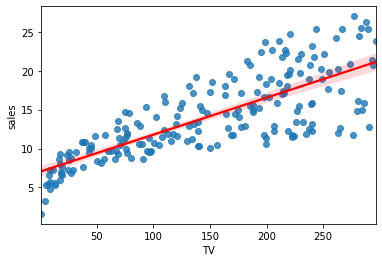

In [3]:
# Plot least-squares line with Seaborn -- a convenient visualization tool.
red_kws = {'color':'red'}
sns.regplot(x="TV", y="sales", data=df, line_kws=red_kws, order=1);

## Linear regression with scikit-learn

We've used linear regression with Seaborn and Scikit-learn.

$$
y = \beta_0 + \beta_1 X + \epsilon
$$

* [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) with the diabetes dataset -- scikit-learn.org

But we haven't had statistical tools to provide quantitative answers to the questions above.

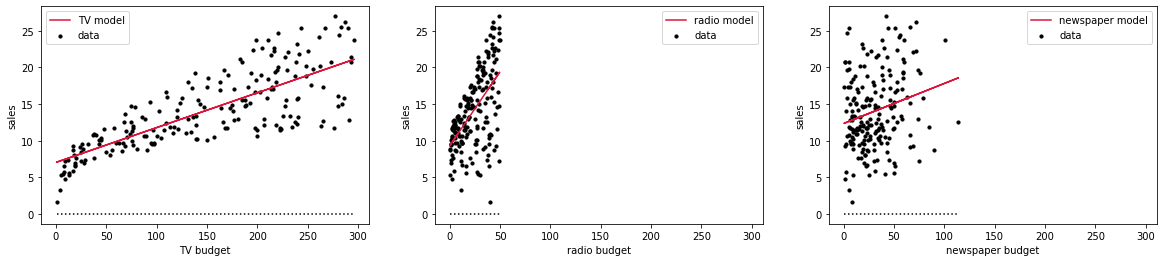

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def univariate_model(df, name):
  X = df[name].values[:, None] # Note the shape change
  y = df['sales']

  regr = linear_model.LinearRegression()
  regr.fit(X, y)
  y_pred = regr.predict(X)

  plt.plot(X, y_pred, color="crimson", label=name + " model");
  
  plt.scatter(X, y, color='black', s=10, label='data')
  plt.xlabel(name + ' budget')
  plt.ylabel('sales')
  plt.plot([X.min(), X.max()], [0,0], 'k:')
  plt.legend();

plt.figure(figsize=(20,4))
ax = plt.subplot(1,3,1)
for i, name in enumerate(['TV', 'radio', 'newspaper']):
  plt.subplot(1,3,i + 1, sharex=ax, sharey=ax)
  univariate_model(df, name)

plt.legend();

# Standard error of the mean

Your dataset: $N$ measurements $y_i$ of some process $\mu$.


Your model:

$$
y_i = \mu + \epsilon_i
$$


* $\mu$ represents the "predictable" part of $y_i$,
* $\mu$ is a constant,
* $\epsilon_i$ represents random measurement error (noise).

You don't know $\mu$, so you'll estimate it from the data. Likewise, you'll use the data to quantify the accuracy of the estimate. That requires additional modeling assumptions. For example, you could assume the mean of $\epsilon_i$ is zero. Then $\mu$ should be the mean of $y_i$, but that depends on what you mean by mean:

* arithmetic mean (average)
* population mean (expected value)
* geometric mean (Nth root of a product of N values)
* weighted arithmetic mean
* etc.

We'll assume that:

* $\mu$ is the [expected value](https://en.wikipedia.org/wiki/Expected_value) (i.e., mean means population mean, which is defined in terms of probability distributions)
* $\epsilon$ has zero mean,
* $\epsilon$ has constant variance $\mathrm{Var}(\epsilon) = \sigma^2$  ([homoscedastic](https://en.wikipedia.org/wiki/Homoscedasticity))
* $\epsilon_i$ is statistically "well behaved" ([independent and identically distributed](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) or IID)

With these assumptions, it's sensible to estimate $\mu$ using the arithmetic mean of the data (sample average):

$$
\bar{y} = \frac{1}{N} \sum_{i=1}^N y_i
$$

along with a well known result from statistics to quantify the accuracy of our estimate:

$$
\mathrm{SE}(\bar{\mu})^2 = \mathrm{Var}(\bar{y}) = \frac{\sigma^2}{N}
$$

The square root of $\mathrm{Var}(\bar{y})$
is also known as the "standard error" of the estimate $\bar{\mu}$ of $\mu$. 

* The standard error tells us how much on average the estimate $\hat{\mu}$ departs from the actual value of $\mu$.
* As you might expect intitutively, 
$\mathrm{SE}$ 
decreases as $N$ increases. 
* More specifically, $\mathrm{SE}$  is inversely proportional to the square root of N.

## Confidence intervals

* Standard errors can be used to compute confidence intervals. 
* A 95% confidence interval for $\hat{\mu}$ is defined as the range of values that will contain the true unknown value of $\mu$ with 95% probability.

## One more assumption

Since we don't know $\sigma^2$, we'll estimate it with the sample variance $s^2$:

$$
\sigma^2 \approx
s^2 \equiv \frac{1}{N-1} \sum_{i=1}^N (y_i - \bar{y})^2
$$


# Check the modeling assumptions

* Do the errors have constant variance?
* If not, what can you do?
  * Nonlinear transformation of the data
  * Remove obvious outliers
  * Weighted least squares

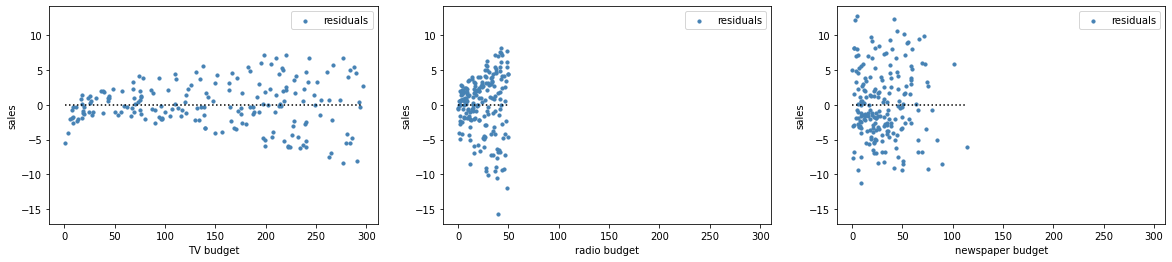

In [5]:
def univariate_residuals(df, name):
  X = df[name].values[:, None] # Note the shape change
  y = df['sales']

  regr = linear_model.LinearRegression()
  regr.fit(X, y)
  y_pred = regr.predict(X)
  resid = y - y_pred
  
  plt.scatter(X, resid, color='steelblue', s=10, label='residuals')
  plt.xlabel(name + ' budget')
  plt.ylabel('sales')
  plt.plot([X.min(), X.max()], [0,0], 'k:')
  plt.legend();

plt.figure(figsize=(20,4))
ax = plt.subplot(1,3,1)
for i, name in enumerate(['TV', 'radio', 'newspaper']):
  plt.subplot(1,3,i + 1, sharex=ax, sharey=ax)
  univariate_residuals(df, name)

plt.legend();

# Assessing the impact of modeling assumptions

We can assess the impact of modeling assumptions by simulating random behavior in the data.

These types of simulations have the advantage that we know some of the true statistics. For example, the variance of uniform distribution:

$$
\int_{-\frac{1}{2}}^{\frac{1}{2}} x^2 dx = 
\frac{1}{3} x^3\Biggr|_{-\frac{1}{2}}^{\frac{1}{2}}
= \frac{1}{12}
$$

We'll use these types of results to normalize variables in our assessments. 

The next cell defines a convenience function for visualizing histograms and comparing them to standard normal distributions.

In [6]:
from scipy.stats import norm
import random

# Convenience function for plotting normalized histogram, KDE and Gaussian
def my_hist(x, y):
  plt.figure(figsize=(15,4))
  ax = plt.subplot(1,2,1)
  sns.scatterplot(x=x, y=y, ax=ax);
  plt.plot([0, len(x)], [0,0], "k:")

  # Plot the normalized histogram and KDE
  ax = plt.subplot(1,2,2)
  sns.histplot(y, ax=ax, stat="density", kde=True, label="histogram")
  sns.kdeplot(y, ax=ax)

  # Add a label for the KDE -- the label will be used in the legend
  ax.get_lines()[0].set_label("KDE")

  # Plot the normal (Gaussian) distribution
  xg = np.linspace(-4,4)
  yg = norm.pdf(xg) # Compute the standard normal PDF
  ax.plot(xg, yg, c="crimson", label='Gaussian')

  # Label the plot
  ax.set_xlabel("Standard Deviations")
  ax.legend();


# Distribution of the data

The next cell simulates random noise from either a standard normal or uniform distribution.


sample average: -0.0957  (estimate of the mean)
sample variance: 0.6498 (estimate of sigma-squared)
Var(sample average) 0.0650  (estimated with sample variance)
Standard Error of the mean: 0.255  (ditto)


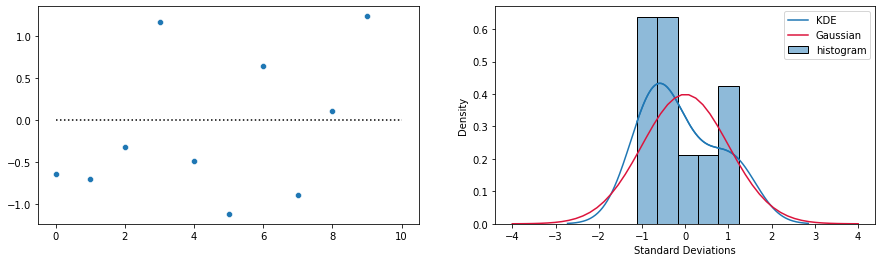

In [7]:
# For reproducibility
#random.seed(42)

def gaussian(n):
  return np.array([random.gauss(0, 1) for i in range(n)])

def uniform(n):
  a = np.sqrt(12)
  return np.array([a * random.uniform(-.5, .5) for i in range(n)])

# Generate some random noise
n = 10
y = gaussian(n)
y = uniform(n)

# Create the independent variable (linear sequence)
x = np.array(range(n))

# Sample statistics
mu_hat = y.mean()
var_hat = ((y - mu_hat)**2).mean()
var_mu_hat = var_hat / n
se_mu_hat = np.sqrt(var_mu_hat)
print('sample average: {:.4f}'.format(mu_hat), " (estimate of the mean)")
print('sample variance: {:.4f}'.format(var_hat), "(estimate of sigma-squared)")
print('Var(sample average) {:.4f}'.format(var_mu_hat), " (estimated with sample variance)")
print('Standard Error of the mean: {:.3f}'.format(se_mu_hat), " (ditto)")

# Custom scatterplot & histogram combo
my_hist(x, y)

# Distribution of the sample average

The sample average of a standard normal random variable divided by $\sigma / N$ itself has a standard normal distribution:
$$
\frac{\bar{y}}{\sigma / \sqrt{N}}
$$

And the variable obtained by substituting $S$ for $\sigma$, 
$$
t = \frac{\bar{y}}{S / \sqrt{N}}
$$
has a Student's t-distribution with N-1 degrees of freedom.

The convenience function in the next cell makes it easy to investigate the impact of
* sample size, $N$...
* the Gaussian assumption...

... when computing the sample average.

What are the implications for $N = 3, 10, 30, 100, 1000$...?

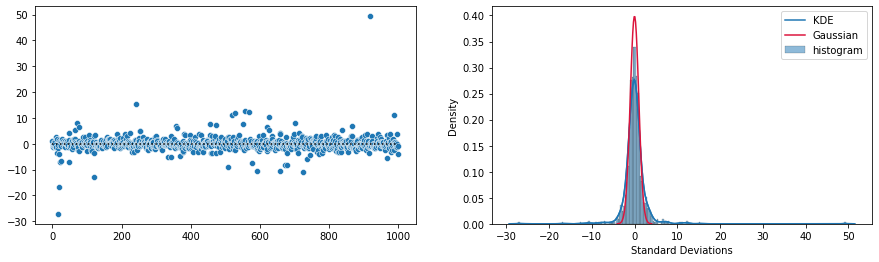

In [8]:
# Convenience function for simulating sample-average of a dataset
def sample_average(n):
  # random.seed(42)

  # generate "n" random numbers with a standard normal distribution
  eps = [random.gauss(0, 1) for i in range(n)]

  # generate "n" random variables from a uniform distribution with zero mean, unit variance
  #eps = [np.sqrt(12) * random.uniform(-.5, .5) for i in range(n)]

  data = np.array(eps)

  mu_hat = data.mean() # sample mean
  std = data.std() * np.sqrt(n / (n-1)) # sample standard deviation

  return mu_hat, std

# n is the number of measurements used to compute the sample average
n = 3

# "m" is the number of experiments (ensemble members) used to compute
# the distribution of the sample mean based on "n" measurements
m = 1000

# Accumulate
y = []
for i in range(m):
  mu_hat, std = sample_average(n)
  yp = mu_hat / (1 / np.sqrt(n))
  t = mu_hat / (std / np.sqrt(n))

  y.append(t)

x = np.array(list(range(m)))
y = np.array(y)

my_hist(x,y)

# Central Limit Theorem

* in many situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution
* this true even if the original variables themselves are not normally distributed
* the theorem is important because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions

Ref: [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) -- wikipedia

# Hypothesis testing

You can test the null hypothesis that the mean is zero.

$$
\mathrm{H_0}: \mu = 0
$$

We'll reject the null hypothesis if the sample value is sufficiently large. We can use the standard error to quantify "sufficiently large". Use a t-statistic

$$
t = \frac{\hat{\mu}}{\mathrm{SE}(\hat{\mu})}
$$

with N-2 degrees of freedom to define a "p-value", which is the probability of observing any number equal to |t| or larger. We reject the null hypothesis if Typical p-value cutoffs for rejecting the null hypothesis are 5 or 1 %, which corresonds to a t-statistic of 2 or 2.75 if $n >> 10$.

### Comparison with Gaussian

* [t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) -- wikipedia
* [t-statistic](https://en.wikipedia.org/wiki/T-statistic) -- wikipedia
* [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) -- wikipedia



In [9]:
import statsmodels.api as sm

X = df[['TV']].copy()
#X = sm.add_constant(X)
y = df['sales'].copy()

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                   3.52e-100
Time:                        19:08:36   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------